Machine Learning and Data Science ‐ ENCS5341
Homework #1

---


Mahmoud Qaisi -190831

In this project it is required to implment Simple Linear regression and Gradient descent using python and then using that implmention to preform regression on the provided data. These are necessry libraries in this project.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as lr

The first step is reading the data from the provided file (grades.csv). Upon inspection the data requires little to no preprocessing.
1. The missing fileds (indicated by zero) were replaced using the average value of the rest of the fields in the row.

In [ ]:
def ReplaceZeros(data):
    for row in data:
        for x in range(0, len(row)):
            if row[x] == 0:
                row[x] = int(sum(row) / 5)
    return data

data = pd.read_csv("grades.csv", skiprows=0, index_col=False)
data = data.values.tolist()
data = ReplaceZeros(data)

2. In order to determine which filed of the inputs ( HW1,HW2,Midterm,Project ) must be used to use, The correlation was calculated between each column and the output.

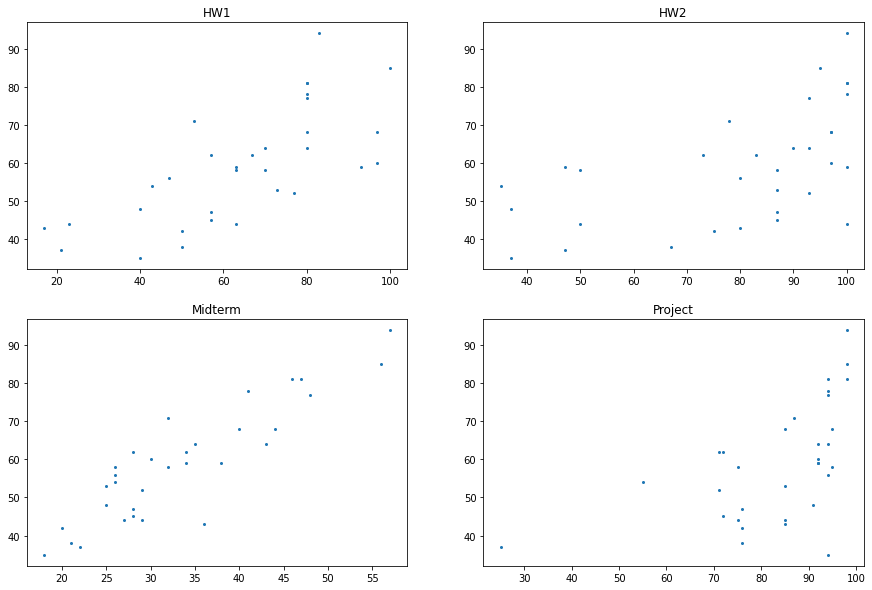

HW1:0.7088524939468588
HW2:0.5663319843584355
Midterm:0.8906808520418152
Project:0.5364657191965538


In [ ]:
def SplitList(data):
    data1 = []
    data2 = []
    data3 = []
    data4 = []
    y = []
    for row in data:
        data1.append(int(row[0]))
        data2.append(int(row[1]))
        data3.append(int(row[2]))
        data4.append(int(row[3]))
        y.append(int(row[4]))
    return np.array(data1), np.array(data2), np.array(data3), np.array(data4), np.array(y)

data1, data2, data3, data4, y = SplitList(data)

figure, axis = plt.subplots(2, 2, figsize=(15,10))

axis[0, 0].scatter(data1, y, s=4)
axis[0, 0].set_title("HW1")

axis[0, 1].scatter(data2, y, s=4)
axis[0, 1].set_title("HW2")

axis[1, 0].scatter(data3, y, s=4)
axis[1, 0].set_title("Midterm")

axis[1, 1].scatter(data4, y, s=4)
axis[1, 1].set_title("Project")

plt.show()

print('HW1:'+str(np.corrcoef(data1,y)[0,1]))
print('HW2:'+str(np.corrcoef(data2,y)[0,1]))
print('Midterm:'+str(np.corrcoef(data3,y)[0,1]))
print('Project:'+str(np.corrcoef(data4,y)[0,1]))


Clearly from the results above the Midterm has the highest corelation to the output. data3 is chosen to use in this process.

---
3. Simple Linear Regression:
The equations used for w0 and w1 were from the slides.

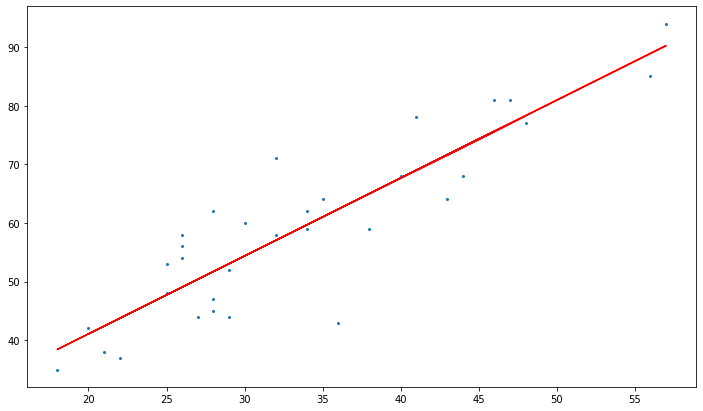

In [ ]:
def linearRegression(x, y):
    n = len(y)
    w1 = (sum(np.multiply(x, y)) - (sum(y) * sum(x)) / n) / (sum(np.multiply(x, x)) - (sum(x) * sum(x)) / n)
    w0 = (sum(y) / n) - (w1 * sum(x) / n)
    return w0, w1

w0, w1 = linearRegression(data3, y)
y_pred = w0 + data3*w1

plt.figure(figsize=(12,7))
plt.scatter(data3, y, s=4)
plt.plot(data3, y_pred, c="r")

4. Gradient Descent:
The following is the implmentation of gradient descent.

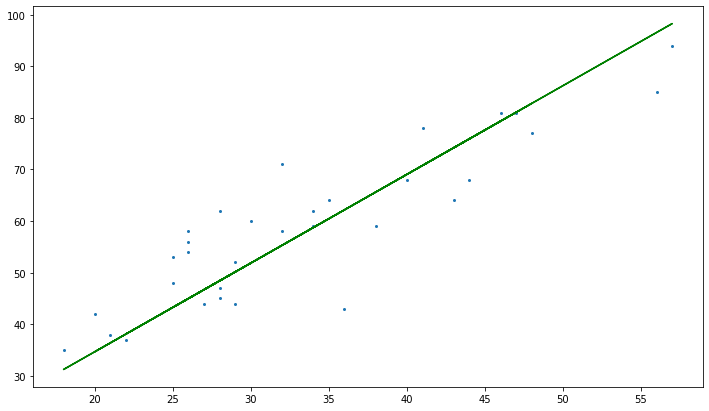

In [ ]:
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true - y_predicted) ** 2) / len(y_true)
    return cost


def gradient_descent(x, y, iterations=1000, learning_rate=0.0001, stopping_threshold=1e-6):
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    for i in range(iterations):

        y_predicted = (current_weight * x) + current_bias

        current_cost = mean_squared_error(y, y_predicted)

        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        weight_derivative = -(2 / n) * sum(x * (y - y_predicted))
        bias_derivative = -(2 / n) * sum(y - y_predicted)

        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

    return current_weight, current_bias

w2, w3 = gradient_descent(data3, y)

y_pred2 = w2 * data3 + w3

plt.figure(figsize=(12,7))
plt.scatter(data3, y, s=4)
plt.plot(data3, y_pred2, c="g")

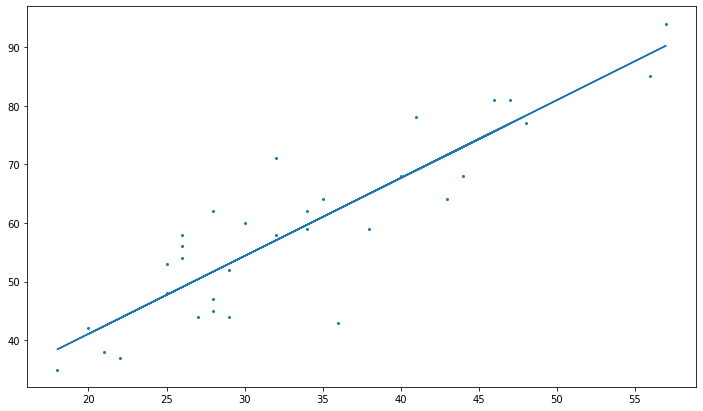

In [ ]:
regressor = lr()

dataT = data3.reshape(-1,1)
yT = y.reshape(-1,1)

regressor.fit(dataT, yT)

y_pred3 = regressor.coef_ * data3 + regressor.intercept_

plt.figure(figsize=(12,7))
plt.scatter(data3, y, s=4)
plt.plot(data3, y_pred3[0])

In order to compare the results from different models, The mean squared error will be used. As the results will show, the error in the gradient descent was higher the the simple linear regression. And the error in the implmented simple linear regression was identrical to the one from the library.

In [ ]:
mse1 = mean_squared_error(y,y_pred)
mse2 = mean_squared_error(y,y_pred2)
mse3 = mean_squared_error(y,y_pred3)

print('Simple Linear Regression: ' + str(mse1))
print('Gradient Descent: ' + str(mse2))
print('scikit-learn Linear Regression: '+str(mse3))

Simple Linear Regression: 45.2579279060308
Gradient Descent: 61.59717990480109
scikit-learn Linear Regression: 45.257927906030815
